In [1]:
from ZGlobalLib.gpu_utils import *
use_gpu(1)

2023-12-25 19:21:13.577886: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')

2023-12-25 19:21:14.008847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9651 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:68:00.0, compute capability: 7.5


In [2]:
import os
import random
import imageio
import glob
import datetime
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tqdm.keras import TqdmCallback
import tensorflow_addons as tfa

from keras import layers
from keras import models
from keras.models import Model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score


In [13]:
dataset_name = 'data/public_dataset'
batch_size = 32

In [34]:
from ZGlobalLib.path import get_images
ims = get_images('data/public_dataset')

file_paths_dataset = tf.data.Dataset.from_tensor_slices(ims)

In [35]:
file_paths_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [15]:
base_model = EfficientNetB0(include_top = False ,weights='imagenet', pooling='avg')

In [16]:
from ZGlobalLib.callbacks import TQDMPredictCallback
embeddings = base_model.predict(train_ds, callbacks=[TQDMPredictCallback()])

  0%|          | 0/466 [00:00<?, ?it/s]

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
def get_top_similar_indices(target_emb, embeddings_list, n=10):
    similarities = []

    for i, emb in enumerate(embeddings_list):
        similarity = cosine_similarity([target_emb], [emb])[0][0]
        similarities.append((i, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    top_similarities = similarities[:n]

    top_indices = [i for i, _ in top_similarities]

    return top_indices

# Get indices of top 10 most similar embeddings to the target embedding

In [ ]:
image_batch, label_batch = next(iter(train_ds.take(1)))
images = image_batch[:10].numpy()/255
labels = label_batch[:10]

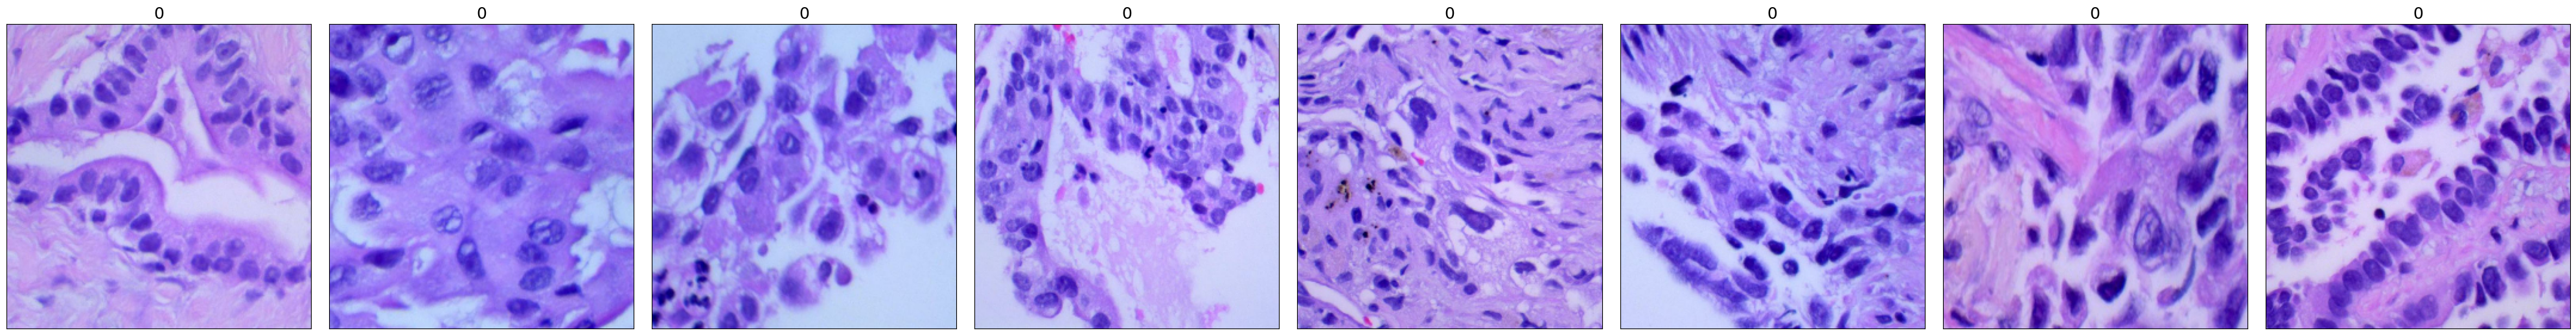

In [26]:
from ZGlobalLib.visualization import plot_frames
plot_frames(zip(images, np.argmax(labels.numpy(),1)))

In [28]:
target_embedding = embeddings[0]
top_10_indices = get_top_similar_indices(target_embedding, embeddings, 10)

In [29]:
top_10_indices

[0, 4970, 4304, 3582, 599, 666, 4244, 4697, 1652, 350]